# Advent of Code 2016

In [1]:
import numpy as np
import pandas as pd
import re
import copy
from collections import Counter, defaultdict, deque
from hashlib import md5
import matplotlib.pyplot as plt
from functools import reduce
from operator import mul
from itertools import combinations, permutations, pairwise
import math

from typing import List

### Table of Contents
- [Day 01: No Time for a Taxicab](#day1)
- [Day 02: Bathroom Security](#day2)
- [Day 03: Squares With Three Sides](#day3)
- [Day 04: Security Through Obscurity](#day4)
- [Day 05: How About a Nice Game of Chess](#day5)
- [Day 06: Signals and Noise](#day6)
- [Day 07: Internet Protocol Version 7](#day7)
- [Day 08: Two Factor Authentication](#day8)
- [Day 09: Explosives in Cyberspace](#day9)
- [Day 10: Balance Bots](#day10)
- [Day 11: Radioisotope Thermoelectric Generators](#day11)
- [Day 12: Leonardo's Monorail](#day12)
- [Day 13: A Maze of Twisty Little Cubicles](#day13)
- [Day 14: One-Time Pad](#day14)
- [Day 15: Timing is Everything](#day15)
- [Day 16: Dragon Checksum](#day16)
- [Day 17: Two Steps Forward](#day17)
- [Day 18: Like a Rogue](#day18)
- [Day 19: An Elephant Named Joseph](#day19)
- [Day 20: Firewall Rules](#day20)
- [Day 21: Scrambled Letters and Hash](#day21)
- [Day 22: Grid Computing](#day22)
- [Day 23: Safe Cracking](#day23)
- [Day 24: Air Duct Spelunking](#day24)
- [Day 25: Clock Signal](#day25)

---

<a id='day1'><a/>

## --- Day 1: No Time for a Taxicab ---

##### Part 1:

In [3]:
def parse_input(puzzle_input):
    with open(puzzle_input) as file:
        text = file.read()
        return text.split(', ')

In [43]:
def solve_puzzle_1(puzzle_input):
    
    # read the data
    instructions = parse_input('data/day01')

    # we start fecing north
    direction_pointer = 0
    
    # increments for each direction
    directions = {
        0: np.array([0 ,1 ]),  # North
        1: np.array([1 ,0 ]),  # East
        2: np.array([0 ,-1]), # South
        3: np.array([-1,0 ]), # West
    }

    #starting position
    position = np.array([0,0])

    # compute instruccion one by one
    for i in instructions:
        direction_pointer = (direction_pointer + 1) if i[0] == 'R' else (direction_pointer - 1)
        position = position + int(i[1:]) * directions[direction_pointer % 4]

    return np.absolute(position).sum()

In [44]:
solve_puzzle_1('data/day01')

279

##### Part 2:

In [69]:
def solve_puzzle_2(puzzle_input):
    
    instructions = parse_input('data/day01')

    direction_pointer = 0
    directions = {
        0: np.array([0 ,1 ]),  # North
        1: np.array([1 ,0 ]),  # East
        2: np.array([0 ,-1]), # South
        3: np.array([-1,0 ]), # West
    }

    position = np.array([0,0])
    hist_positions = []
       
    for i in instructions:
        direction_pointer = (direction_pointer + 1) if i[0] == 'R' else (direction_pointer - 1)
        for step in range(int(i[1:])):
            position = position + directions[direction_pointer % 4]
            if tuple(position) in hist_positions:
                return np.absolute(position).sum()
            else:
                hist_positions.append(tuple(position))

In [70]:
solve_puzzle_2('data/day01')

163

---

<a id='day2'><a/>

## --- Day 2: Bathroom Security ---

##### Part 1:

In [18]:
def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    return lines

In [49]:
k = [[1,2,3],
     [4,5,6],
     [7,8,9]]
k = np.array(k)

m = {
    'L' : np.array([0,-1]),
    'R' : np.array([0,1]),
    'U' : np.array([-1,0]),
    'D' : np.array([1,0])    
}

In [50]:
def solve_puzzle_1(puzzle_input):
    lines = parse_input(puzzle_input)
    code = ''
    position = np.array([1,1])
    for line in lines:
        for move in line:
            
            # np.clip keeps the values of the array inside the specified boundaries
            position = np.clip(position + m[move], 0, 2)
            
        code += str(k[tuple(position)])
    
    return code    

In [51]:
solve_puzzle_1('data/day02_example')

'1985'

In [52]:
solve_puzzle_1('data/day02')

'47978'

##### Part 2:

In [53]:
k = [['*','*','1','*','*'],
     ['*','2','3','4','*'],
     ['5','6','7','8','9'],
     ['*','A','B','C','*'],
     ['*','*','D','*','*']]
k = np.array(k)

m = {
    'L' : np.array([0,-1]),
    'R' : np.array([0,1]),
    'U' : np.array([-1,0]),
    'D' : np.array([1,0])    
}

In [54]:
def solve_puzzle_2(puzzle_input):
    lines = parse_input(puzzle_input)
    code = ''
    position = np.array([2,0])
    for line in lines:
        for move in line:
            
            # np.clip keeps the values of the array inside the specified boundaries
            new_position = np.clip(position + m[move], 0, 4)
            
            # if the move goes to any '*' discard the move
            if k[tuple(new_position)] != '*':
                position = new_position
    
        code += k[tuple(position)]
        
    return code

In [55]:
solve_puzzle_2('data/day02_example')

'5DB3'

In [56]:
solve_puzzle_2('data/day02')

'659AD'

---

<a id='day3'><a/>

## --- Day 3: Squares With Three Sides ---

##### Part 1:

In [106]:
def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
        lines = [re.sub(r' +', r' ', line).strip().split(' ') for line in lines]
        lines = [[int(num) for num in line] for line in lines]
        triangles = np.array(lines)
    return triangles

In [121]:
def solve_puzzle_1(puzzle_input):
    triangles = parse_input(puzzle_input)
    triangles = triangles[triangles[:,0] + triangles[:,1] > triangles[:,2]]
    triangles = triangles[triangles[:,0] + triangles[:,2] > triangles[:,1]]
    triangles = triangles[triangles[:,1] + triangles[:,2] > triangles[:,0]]
    return triangles.shape[0]

In [122]:
solve_puzzle_1('data/day03')

862

##### Part 2:

In [125]:
def solve_puzzle_2(puzzle_input):
    triangles = parse_input(puzzle_input)
    triangles = triangles.ravel(order='F').reshape(-1,3)
    triangles = triangles[triangles[:,0] + triangles[:,1] > triangles[:,2]]
    triangles = triangles[triangles[:,0] + triangles[:,2] > triangles[:,1]]
    triangles = triangles[triangles[:,1] + triangles[:,2] > triangles[:,0]]
    return triangles.shape[0]

In [126]:
solve_puzzle_2('data/day03')

1577

---

<a id='day4'><a/>

## --- Day 4: Security Through Obscurity ---

##### Part 1:

In [10]:
def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    return lines

In [11]:
def solve_puzzle_1(puzzle_input):
    
    rooms = parse_input(puzzle_input)

    result = 0
    for room in rooms:
        checksum = room[-6:-1]
        sector_id = int(room[-10:-7])
        encrypted_name = room[:-10]
        counts = Counter(re.sub('-', '', encrypted_name)).most_common()
        code = "".join([tup[0] for tup in sorted(counts, key=lambda tup: (tup[1]*(-1), tup[0]))[:5]])
        if code == checksum:
            result += sector_id

    return result

In [12]:
solve_puzzle_1('data/day04')

409147

##### Part 2:

In [40]:
def shift_ch(ch, num):
    return chr((ord(ch) - 97 + num) % 26 + 97)

In [42]:
puzzle_input = 'data/day04'
rooms = parse_input(puzzle_input)

real_rooms_descrypted = []
for room in rooms:
    checksum = room[-6:-1]
    sector_id = int(room[-10:-7])
    encrypted_name = room[:-10]
    counts = Counter(re.sub('-', '', encrypted_name)).most_common()
    code = "".join([tup[0] for tup in sorted(counts, key=lambda tup: (tup[1]*(-1), tup[0]))[:5]])
    if code == checksum:
        result = ''
        for ch in encrypted_name:
            if ch == '-':
                result += ' '
            else:
                result += shift_ch(ch, sector_id)

        real_rooms_descrypted.append((sector_id, result.strip()))
        
for room in real_rooms_descrypted:
    if 'north' in room[1]:
        print(room)

(991, 'northpole object storage')


---

<a id='day5'><a/>

## --- Day 5: How About a Nice Game of Chess ---

Not very efficient brute force solution using hashlib

##### Part 1:

In [104]:
def solve_puzzle_1(puzzle_input):
    password = ''
    i = 0
    while len(password) < 8:
        h = str(md5(bytes(puzzle_input + str(i), 'utf-8')).hexdigest())[:6]
        if h[:5] == '00000':
            password += h[-1]
        i += 1

    return password

In [62]:
solve_puzzle_1('abc')

'18f47a30'

In [63]:
solve_puzzle_1('cxdnnyjw')

'f77a0e6e'

##### Part 2:

In [108]:
def edit_str(s, pos, value):
    return s[:pos] + value + s[pos+1:]

In [109]:
def solve_puzzle_2(puzzle_input):
    password = '________'
    i = 0
    while '_' in password:
        
        h = str(md5(bytes(puzzle_input + str(i), 'utf-8')).hexdigest())[:7]
        if h[:5] == '00000' and h[5] in '01234567' and password[int(h[5])] == '_':
            password = edit_str(password, int(h[5]), h[6])
        i += 1

    return password

In [110]:
solve_puzzle_2('abc')

'05ace8e3'

In [111]:
solve_puzzle_2('cxdnnyjw')

'999828ec'

---

<a id='day6'><a/>

## --- Day 6: Signals and Noise ---

##### Part 1:

In [130]:
def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    return lines

In [131]:
def solve_puzzle_1(puzzle_input):
    messages = parse_input(puzzle_input)
    messages = [''.join([w[i] for w in messages])for i in range(len(messages[0]))]
    return ''.join([Counter(message).most_common(1)[0][0] for message in messages])

In [132]:
solve_puzzle_1('data/day06_example')

'easter'

In [133]:
solve_puzzle_1('data/day06')

'qzedlxso'

##### Part 2:

In [143]:
def solve_puzzle_2(puzzle_input):
    messages = parse_input(puzzle_input)
    messages = [''.join([w[i] for w in messages])for i in range(len(messages[0]))]
    return ''.join([Counter(message)[0][0] for message in messages])

In [146]:
def solve_puzzle_2(puzzle_input):
    messages = parse_input(puzzle_input)
    messages = [''.join([w[i] for w in messages])for i in range(len(messages[0]))]
    return ''.join([Counter(message).most_common()[-1][0][0] for message in messages])

In [147]:
solve_puzzle_2('data/day06_example')

'advent'

In [148]:
solve_puzzle_2('data/day06')

'ucmifjae'

---

<a id='day7'><a/>

## --- Day 7: Internet Protocol Version 7 ---

##### Part 1:

In [2]:
def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    return lines

In [32]:
def is_abba(seq):
    return (seq == seq[::-1]) and (seq[1:3] != seq[0]+seq[3])

def supports_tls(ip_address):

    abba = False
    hypernet = False
    
    for i in range(len(ip_address)-3):
        seq = ip_address[i:i+4]         # sequence

        if '[' in seq:         # entering in hypernet
            hypernet = True
            continue

        if ']' in seq:
            hypernet = False   # going out of hypernet
            continue

        if is_abba(seq):       
            abba = True
            if hypernet:
                return False   # if sequence is abba and we are in hypernet the adress NOT support tls

    return abba   # withous abbas in hypernet, the adress suports tls if there is any abba out of hypernet
    
    
supports_tls('abba[mnop]qrs')
supports_tls('abcd[bddb]xyyx')
supports_tls('aaaa[qwer]tyui')
supports_tls('ioxxoj[asdfgh]zxcvbn')

True

False

False

True

In [35]:
def solve_puzzle_1(puzzle_input):
    ip_adresses = parse_input(puzzle_input)
    suporting_ip_adresses = sum([supports_tls(ip_adress) for ip_adress in ip_adresses])
    return suporting_ip_adresses

In [36]:
solve_puzzle_1('data/day07')

105

##### Part 2:

In [42]:
def is_aba(seq):
    return (seq == seq[::-1]) and (seq[1] != seq[2])


def supports_ssl(ip_address):

    aba = []
    bab = []
    hypernet = False
    
    for i in range(len(ip_address)-2):
        seq = ip_address[i:i+3]         # sequence

        if '[' in seq:         # entering in hypernet
            hypernet = True
            continue

        if ']' in seq:
            hypernet = False   # going out of hypernet
            continue

        if is_aba(seq):       
            if hypernet:
                bab.append(seq)
            else:
                aba.append(seq)   # if sequence is abba and we are in hypernet the adress NOT support tls

    for aba_seq in aba:
        for bab_seq in bab:
            if aba_seq == bab_seq[1:]+bab_seq[1]:
                return True
    return False
        
    
supports_ssl('aba[bab]xyz')
supports_ssl('xyx[xyx]xyx')
supports_ssl('aaa[kek]eke')
supports_ssl('zazbz[bzb]cdb')


True

False

True

True

In [43]:
def solve_puzzle_2(puzzle_input):
    ip_adresses = parse_input(puzzle_input)
    suporting_ip_adresses = sum([supports_ssl(ip_adress) for ip_adress in ip_adresses])
    return suporting_ip_adresses

In [44]:
solve_puzzle_2('data/day07')

258

---

<a id='day8'><a/>

## --- Day 8: Two Factor Authentication ---

##### Part 1:

In [96]:
def parse_instruction(instruction):
    """
    Convert an instruction like 'rect 3x2' in ('rect',3,2)
    Convert an instruction like 'rotate column x=1 by 1' in ('column',1,1)
    Convert an instruction like 'rotate row y=0 by 4' in ('row',0,4)
    """
    if instruction.startswith('rect'):
        a, b = (int(dim) for dim in instruction[5:].split('x'))
        return 'rect', a, b
    elif instruction.startswith('rotate row'):
        y, shift = (int(dim) for dim in instruction[13:].split(' by '))
        return 'row', y, shift
    elif instruction.startswith('rotate column'):
        x, shift = (int(dim) for dim in instruction[16:].split(' by '))
        return 'column', x, shift

    
def parse_input(puzzle_input):
    """
    Reads the puzzle input and returns a list of instructions of any of the
    3 different types: 'rect', 'row' or 'column'
    """
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    
    return [parse_instruction(instruction) for instruction in lines]


def execute_instruction(instruction, screen):
    """
    Execute an instruction on a screen. Returns the modified screen
    """
    
    if instruction[0] == 'rect':
        a, b = instruction[1], instruction[2]
        screen[0:b, 0:a] = 1
    elif instruction[0] == 'row':
        y, shift = instruction[1], instruction[2]
        screen[y,:] = np.roll(screen[y,:], shift)
    elif instruction[0] == 'column':
        x, shift = instruction[1], instruction[2]
        screen[:,x] = np.roll(screen[:,x], shift)
    
    return screen

In [111]:
screen = np.zeros((6,50), dtype=int)
instructions = parse_input('data/day08')
for instruction in instructions:
    screen = execute_instruction(instruction, screen)

print("Puzzle 1 solution: ", screen.sum())

Puzzle 1 solution:  116


##### Part 2:

Puzzle 2 solution:


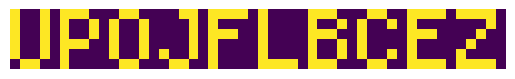

In [112]:
print("Puzzle 2 solution:")
plt.imshow(screen);
plt.axis('off');

---

<a id='day9'><a/>

## --- Day 9: Explosives in Cyberspace ---

##### Part 1:

In [1]:
def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        file = f.read()
    return file



def decompress(file):
    
    decompressed = ''
    while file:
        idx_open = file.find('(')  # find first occurrence of "("
        
        if idx_open == -1:
            decompressed += file
            break
        
        decompressed += file[:idx_open]
        file = file[idx_open:]

        # start a decompress section
        idx_close = file.find(')')
        length, times = [int(value) for value in file[1:idx_close].split('x')]
        file = file[idx_close+1:]
        segment = file[:length]
        for _ in range(times):
            decompressed += segment
        file = file[length:]

    return decompressed


def solve_puzzle_1(puzzle_input):

    file = parse_input(puzzle_input)
    return len(decompress(file))

In [2]:
solve_puzzle_1('data/day09')

107035

##### Part 2:

Part 1 solution is not possible due to memory issues. It's not possible to decompress the entire file and calculate its length. Instead we have to calculate the length by parts using multiplication to calculate the repeated sections and using recursion to deal with the nested compressed segments

- Splitting the file in 3 parts:  
    - example: 'ABC(3x3)XYZMNO' will be: length('ABC') + 3 * length('XYZ') + length('MNO')
    - Use recursion in each part to deal with nested compressions

In [20]:
def get_decompressed_lenght(file):
    idx_open = file.find('(')  # find first occurrence of "("

    if idx_open == -1:
        return len(file)

    else:

        idx_close = file.find(')')
        length, times = [int(value) for value in file[idx_open+1:idx_close].split('x')]
        
        part_1 = get_decompressed_lenght(file[:idx_open])
        part_2 = times * get_decompressed_lenght(file[idx_close+1:idx_close+length+1])
        part_3 = get_decompressed_lenght(file[idx_close+length+1:])
        
        return part_1 + part_2 + part_3

    
def solve_puzzle_2(puzzle_input):

    file = parse_input(puzzle_input)
    return get_decompressed_lenght(file)

In [21]:
solve_puzzle_2('data/day09')

11451628995

---

<a id='day10'><a/>

## --- Day 10: Balance Bots ---

##### Part 1:

In [2]:
def process_instruction(instruction):
    
    instruction_words = instruction.split(' ')

    if instruction_words[0] == 'value':
        value = int(instruction_words[1])
        bot = int(instruction_words[-1])
        return ('add_microchip', bot, value)
    
    else:
        bot = int(instruction_words[1])
        low_type = instruction_words[5]
        low_value = int(instruction_words[6])
        high_type = instruction_words[10]
        high_value = int(instruction_words[11])
        return ('pattern', bot, low_type, low_value, high_type, high_value)


def parse_input(puzzle_input):
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    
    return [process_instruction(line) for line in lines]

In [3]:
instructions = parse_input('data/day10')
instructions[:3]

[('add_microchip', 209, 61),
 ('pattern', 200, 'bot', 40, 'bot', 141),
 ('pattern', 197, 'bot', 202, 'bot', 65)]

In [4]:
# max bot and output
max_bot, max_output = 0, 0
max_bot = max(max_bot, max([i[1] for i in instructions if i[0] == 'add_microchip']))
max_bot = max(max_bot, max([i[1] for i in instructions if i[0] == 'pattern']))
max_bot = max(max_bot, max([i[3] for i in instructions if i[0] == 'pattern' and i[2] == 'bot']))
max_bot = max(max_bot, max([i[5] for i in instructions if i[0] == 'pattern' and i[4] == 'bot']))
max_output = max(max_output, max([i[3] for i in instructions if i[0] == 'pattern' and i[2] == 'output']))
max_output = max(max_output, max([i[5] for i in instructions if i[0] == 'pattern' and i[4] == 'output']))
print(max_bot, max_output)

209 20


In [5]:
class Bot:
    
    target_microchip_1 = 17
    target_microchip_2 = 61
    
    
    def __init__(self, number):
        self.number = number
        self.microchips = []
        self.has_pattern = False
        self.pattern = {'low':  {'type': None, 'number':None},
                        'high': {'type': None, 'number':None}}
        
        
    def __repr__(self):
        return f'{self.microchips}'
    
    
    def is_target(self):
        """
        Check if the bot is the one we are looking for, that is, 
        the bot that contains the 2 microchips 17 and 61
        """
        if sorted(self.microchips) == [Bot.target_microchip_1, Bot.target_microchip_2]:
            return True
        else:
            return False
 

    def set_pattern(self, low_type, low_number, high_type, high_number):
        """
        Get the pattern from instructions and check if can be inmediately triggered
        """
        self.pattern['low']['type'] = instruction[2]
        self.pattern['low']['number'] = instruction[3]
        self.pattern['high']['type'] = instruction[4]
        self.pattern['high']['number'] = instruction[5]
        self.has_pattern = True
        if len(self.microchips) == 2:
            self.execute_transactions()


    def add_microchip(self, microchip):
        """
        Action in which a bot gets a microchip from whoever is the sender.
        The microchip is added to the bot and execute_transactions method is triggered
        if the bot has the conditions to do so.
        
        """
        self.microchips.append(microchip)
        if len(self.microchips) == 2 and self.has_pattern:
            self.execute_transactions()
        
    
    def execute_transactions(self):
        """
        The bot is supposed to get here if has 2 microchips and a pattern defined.
        First we check if the Bot is the Target Bot
        After that we compute two transactions: send the low-value and high-value microchips
        to either a bot or to the output bin, depending on the pattern defined.
        """
        
        self.microchips = sorted(self.microchips)
        if self.is_target():
            print(f'{self.number} is the target bot')

        low_value, high_value = self.microchips

        # transaction LOW
        if self.pattern['low']['type'] == 'output':
            self.transaction_output(self.pattern['low']['number'], low_value)
        else:
            receiver = bots[self.pattern['low']['number']]
            self.transaction_bot(receiver, low_value)

        # transaction HIGH        
        if self.pattern['high']['type'] == 'output':
            self.transaction_output(self.pattern['high']['number'], high_value)
        else:
            receiver = bots[self.pattern['high']['number']]
            self.transaction_bot(receiver, high_value)
    
    
    def transaction_output(self, number, microchip):
        """
        A bot sends a microchip to the specified output bin
        """
        self.microchips.remove(microchip)
        outputs[number].append(microchip)

        
    def transaction_bot(self, other, microchip):
        """
        A bot sends a microchip to another bot, who gets it.
        """
        self.microchips.remove(microchip)
        other.add_microchip(microchip)


        

In [6]:
bots = {num: Bot(num) for num in range(max_bot+1)}
outputs = {num: [] for num in range(max_output+1)}

In [7]:
def compute_instruction(instruction):
    
    bot = bots[instruction[1]]
    
    if instruction[0] == 'pattern':
        bot.set_pattern(instruction[2], instruction[3], instruction[4], instruction[5])
    
    elif instruction[0] == 'add_microchip':
        bot.add_microchip(instruction[2])
    
    
for instruction in instructions:
    compute_instruction(instruction)

157 is the target bot


##### Part 2:

We already have the microchips in the output bins. We have just to multiply the microchip values of the bins 0,1 and 2

In [8]:
reduce(mul, [reduce(mul, outputs[i], 1) for i in [0,1,2]], 1)

1085

---

<a id='day11'><a/>

## --- Day 11: Radioisotope Thermoelectric Generators ---

##### Part 1:

Breath First Search Algorithm is appropiate because we will traverse a graph where we try to find the first occurance of the finish state. The search space needs to be cut in order to get a solution in a reasonable time. Implementing a cache storing the exact state of each step explored is not enough. We need to think about what represents a **unique state**. The answer is the state is uniquely represented for the purpose of the problem by counting the number of elements of each type that are present in each floor, without taking care of the name of the elements.

##### Naming:
- "Elements Set" is a list of elements put together, for example in the same floor or in the elevator. Example: `['PrG', 'PrM']`
- "Arrengement" is a dictionary representing the whole state, including the Elements Sets in each floor and the position of the elevator. Example: `{  4: [], 3: ['CoM', 'CuM', 'RuM', 'PlM'], 2: ['CoG', 'CuG', 'RuG', 'PlG'], 1: ['PrG', 'PrM'], 'E' : 1,}`
- Arrengement State is a representation thet defines uniquely the arrengement for the purposes of this problem. We will use tuples for each floor where the first item is the number of generators and the second the number of microchips. The example above has the following state: `{ 4:(0,0), 3:(0,4), 2:(4,0), 1:(1,1), 'E':1}`

In [66]:
def elements_set_list_to_array(arrengement_list: List, problem_config: dict) -> np.array:
    """
    Creates an array with a set of elements, wich is easier to calculate things on it, like see if it's valid.
    """
    arrengement_idx = [problem_config['IDX_MAPPING'][piece] for piece in arrengement_list]
    arr = np.zeros((problem_config['NUM_ELEMENTS'],problem_config['NUM_TYPES']), dtype=int)
    for idx in arrengement_idx:
        arr[idx] = 1
    return arr


def is_valid_elements_set(arr: np.array) -> bool:
    """
    Two conditions must NOT happen together:
    - There is at least one RTGs (paired or not)
    - There is at least one not paired microchip
    """
    there_are_rtgs = arr.sum(axis=0)[0] > 0
    there_are_vulnerable_microchips = [0,1] in arr.tolist()
    return not (there_are_rtgs and there_are_vulnerable_microchips)
    

def get_possible_arrengements(arrengement: dict, problem_config: dict) -> List[dict]:
    """
    Given an arrengement, returns all the possible next states
    arrengement is a dict with the keys: 'E',1,2,3,4. The values for 'E' is one of 1,2,3,4. The values of 1,2,3,4 is a List of strings
    representing the set in that floor. 
    """
    
    current = arrengement['E']
    lower_floor_with_elements = np.argmin((np.array([len(arrengement[floor]) for floor in [1,2,3,4]]).cumsum() == 0)) + 1
    
    destinations = [current + 1, current - 1]
    destinations = [floor for floor in destinations if floor in [1,2,3,4]] # avoid going to 0 or 5
    destinations = [floor for floor in destinations if floor >= lower_floor_with_elements] # avoid going down if there are not elements
    

    possible_arrengements = []
    for destination in destinations:
        # take one element:
        for element in arrengement[current]:
            new_arrengement = copy.deepcopy(arrengement)
            new_arrengement['E'] = destination
            new_arrengement[current].remove(element)
            if not is_valid_elements_set(elements_set_list_to_array(new_arrengement[current], problem_config)):
                continue

            new_arrengement[destination].append(element)
            new_arrengement[destination] = sorted(new_arrengement[destination])
            if not is_valid_elements_set(elements_set_list_to_array(new_arrengement[destination], problem_config)):
                continue

            possible_arrengements.append(new_arrengement)

        # take two element (only going up)
        for pair in combinations(arrengement[current], 2):
            if not is_valid_elements_set(elements_set_list_to_array(pair, problem_config)):
                continue

            new_arrengement = copy.deepcopy(arrengement)
            new_arrengement['E'] = destination
            for element in pair:
                new_arrengement[current].remove(element)
            if not is_valid_elements_set(elements_set_list_to_array(new_arrengement[current], problem_config)):
                continue

            new_arrengement[destination].extend(pair)
            new_arrengement[destination] = sorted(new_arrengement[destination])
            if not is_valid_elements_set(elements_set_list_to_array(new_arrengement[destination], problem_config)):
                continue

            possible_arrengements.append(new_arrengement)

    return possible_arrengements    



def get_arrengement_state(arrengement: dict, problem_config: dict) -> dict:
    arrengement_state = {}
    for key in [4,3,2,1]:
        arrengement_state[key] = tuple(elements_set_list_to_array(arrengement[key], problem_config).sum(axis=0))
    arrengement_state['E'] = arrengement['E']
    return arrengement_state



def is_final_arrengement(arrengement: dict) -> bool:
    """
    Returns True if all the components are in the 4th floor
    """
    return len(arrengement[3]) + len(arrengement[2]) + len(arrengement[1]) == 0


def solve_puzzle_1(initial_arrengement):

    floor_sets = list(initial_arrengement.values())[0:-1]
    floor_sets = [item for sublist in floor_sets for item in sublist]
    elements = list(set([item[:2] for item in floor_sets]))
    problem_config = {'IDX_MAPPING': {EL+M:(i, j) for i,EL in enumerate(elements) for j,M in enumerate(['G','M'])},
                      'NUM_ELEMENTS': len(elements),
                      'NUM_TYPES': 2,
                     }

    q = deque()
    i = 0
    q.append((i, initial_arrengement, [i]))
    cache = []
    
    while q:    
        _id, current_arrengement, path = q.popleft()
        current_arrengement_state = get_arrengement_state(current_arrengement, problem_config)
        if current_arrengement_state in cache:
            continue
       
        if is_final_arrengement(current_arrengement):
            final_result = len(path)-1
            break
        
        cache.append(current_arrengement_state)
    
        for arrengement in get_possible_arrengements(current_arrengement, problem_config):
            i += 1
            new_path = path + [i]
            q.append((i, arrengement, new_path))
    
    return len(path)-1

In [67]:
INITIAL_ARRENGEMENT = {    4: [],
                     3: ['LiG'],
                     2: ['HiG'],
                     1: ['HiM', 'LiM'],
                     'E' : 1,
                  }

solve_puzzle_1(INITIAL_ARRENGEMENT)

11

In [68]:
INITIAL_ARRENGEMENT = {  4: [],
                         3: ['CoM', 'CuM', 'PlM', 'RuM'],
                         2: ['CoG', 'CuG', 'PlG', 'RuG'],
                         1: ['PrG', 'PrM'],
                         'E' : 1,
                        }

solve_puzzle_1(INITIAL_ARRENGEMENT)

33

##### Part 2:

Just the same problem that the Part 1, adding 4 extra elements in the first floor. It takes a little longer but it's fine

In [69]:
INITIAL_ARRENGEMENT = {  4: [],
                         3: ['CoM', 'CuM', 'PlM', 'RuM'],
                         2: ['CoG', 'CuG', 'PlG', 'RuG'],
                         1: ['PrG', 'PrM', 'ElG', 'ElM', 'DiG', 'DiM'],
                         'E' : 1,
                        }

solve_puzzle_1(INITIAL_ARRENGEMENT)

57

---

<a id='day12'><a/>

## --- Day 12: Leonardo's Monorail ---

For this puzzle is useful the `exec` function wich allows us treat strings as code to execute

##### Example

In [41]:
with open('data/day12_example') as f:
    steps = f.read().splitlines()
    steps = [step.split() for step in steps]

a, b, c, d = 0, 0, 0, 0
i = 0
while i < len(steps):
    
    step = steps[i]
    
    if step[0] == 'cpy':
        exec(f'{step[2]}={step[1]}')
    elif step[0] == 'inc':
        exec(f'{step[1]} += 1')
    elif step[0] == 'dec':
        exec(f'{step[1]} -= 1')
    elif step[0] == 'jnz':
        if eval(f'{step[1]} != 0'):
            i += int(step[2])
            continue  # to skip incrementing one of the other cases
    i += 1

print(a)

42


##### Part 1:

In [24]:
with open('data/day12') as f:
    steps = f.read().splitlines()
    steps = [step.split() for step in steps]

a, b, c, d = 0, 0, 0, 0
i = 0
while i < len(steps):
    
    step = steps[i]
    
    if step[0] == 'cpy':
        exec(f'{step[2]}={step[1]}')
    elif step[0] == 'inc':
        exec(f'{step[1]} += 1')
    elif step[0] == 'dec':
        exec(f'{step[1]} -= 1')
    elif step[0] == 'jnz':
        if eval(f'{step[1]} != 0'):
            i += int(step[2])
            continue  # to skip incrementing one of the other cases
    i += 1

print(a)

318003


##### Part 2:

In [25]:
with open('data/day12') as f:
    steps = f.read().splitlines()
    steps = [step.split() for step in steps]

a, b, c, d = 0, 0, 1, 0
i = 0
while i < len(steps):
    
    step = steps[i]
    
    if step[0] == 'cpy':
        exec(f'{step[2]}={step[1]}')
    elif step[0] == 'inc':
        exec(f'{step[1]} += 1')
    elif step[0] == 'dec':
        exec(f'{step[1]} -= 1')
    elif step[0] == 'jnz':
        if eval(f'{step[1]} != 0'):
            i += int(step[2])
            continue  # to skip incrementing one of the other cases
    i += 1

print(a)

9227657


---

<a id='day13'><a/>

## --- Day 13: A Maze of Twisty Little Cubicles ---

Seems a BSF algorithm can get the job done. We need to define the rules of where are allowed positions to go on each step, and cache the positions where we have already been before.

##### Part 1:

In [3]:
def is_open_space(position: tuple, key: int) -> bool:

    x, y = position
    number = x*x + 3*x + 2*x*y + y + y*y + key
    binary = f'{number:b}'
    return sum([int(bit) for bit in binary]) % 2 == 0


def is_in_the_building(position: tuple) -> bool:
    x, y = position
    return x >= 0 and y >= 0
    

def get_next_positions(current_position: tuple, key: int) -> List[tuple]:
    x, y = current_position
    next_positions = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
    next_positions = [position for position in next_positions if is_in_the_building(position) and is_open_space(position, key)]
    return next_positions



In [50]:
def solve_puzzle_1(initial_position, final_position, key):
    
    initial_state = (initial_position, [initial_position])
    q = deque()
    q.append(initial_state)
    cache = []
    shortest_path = []
    
    while q:
    
        current_position, current_path = q.popleft()    
        if current_position == final_position:
            shortest_path = current_path
            break
        
        if current_position in cache:
            continue  
        
        cache.append(current_position)
        for next_position in get_next_positions(current_position, key):
            new_path = current_path.copy()
            new_path.append(next_position)
            q.append((next_position, new_path))
        
    print(f'Shortest Path: {shortest_path}')
    print(f'Steps: {len(shortest_path)-1}')

    max_x, max_y = final_position
    max_x += 10
    max_y += 10
    laberinth = np.zeros((max_y,max_x), dtype=int);
    for i in range(max_x):
        for j in range(max_y):
            laberinth[j,i] = is_open_space((i,j), KEY)
    
    for x, y in shortest_path:
        laberinth[y, x] = 2
    
    plt.imshow(laberinth);
    plt.axis('off');

Shortest Path: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (7, 4)]
Steps: 11


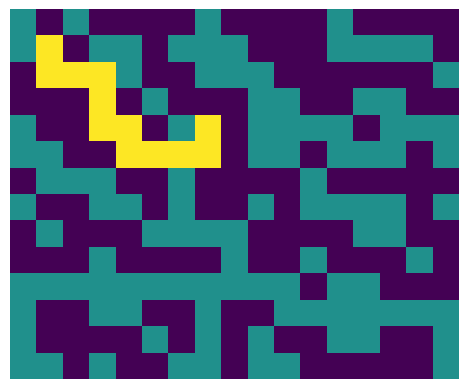

In [51]:
solve_puzzle_1((1,1), (7,4), 10)

Shortest Path: [(1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (13, 4), (13, 5), (13, 6), (14, 6), (14, 7), (14, 8), (14, 9), (13, 9), (12, 9), (11, 9), (11, 10), (11, 11), (11, 12), (11, 13), (10, 13), (10, 14), (10, 15), (10, 16), (11, 16), (12, 16), (13, 16), (13, 17), (13, 18), (13, 19), (14, 19), (15, 19), (16, 19), (16, 18), (17, 18), (18, 18), (18, 19), (19, 19), (19, 20), (19, 21), (19, 22), (19, 23), (19, 24), (20, 24), (20, 25), (21, 25), (22, 25), (22, 24), (23, 24), (24, 24), (25, 24), (26, 24), (26, 25), (26, 26), (26, 27), (27, 27), (28, 27), (29, 27), (30, 27), (30, 28), (30, 29), (30, 30), (30, 31), (30, 32), (31, 32), (32, 32), (33, 32), (33, 33), (33, 34), (33, 35), (32, 35), (32, 36), (32, 37), (33, 37), (34, 37), (35, 37), (35, 38), (35, 39), (35, 40), (35, 41), (35, 42), (34, 42), (33, 42), (32, 42), (32, 41), (32, 40), (32, 39), (31, 39)]
Steps: 96


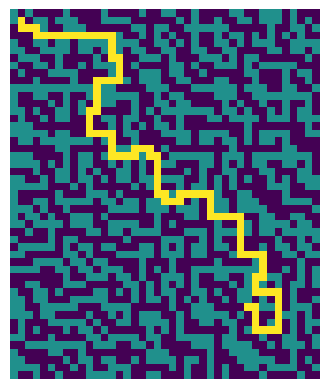

In [53]:
solve_puzzle_1((1,1), (31,39), 1358)

##### Part 2:

In [75]:
def solve_puzzle_2(initial_position, max_steps, key):
    
    initial_state = (initial_position, 0)
    q = deque()
    q.append(initial_state)
    cache = []
    
    while q:
    
        current_position, steps = q.popleft()
        if current_position in cache:
            continue  
        
        cache.append(current_position)
        if steps == max_steps:
            continue
        
        for next_position in get_next_positions(current_position, key):
            q.append((next_position, steps+1))
        
    positions = list(set(cache))
    print(f'Different Locations: {len(positions)}')

    max_x, max_y = (30,30)
    laberinth = np.zeros((max_y,max_x), dtype=int);
    for i in range(max_x):
        for j in range(max_y):
            laberinth[j,i] = is_open_space((i,j), KEY)
    
    for x, y in positions:
        laberinth[y, x] = 2
    
    plt.imshow(laberinth);
    plt.axis('off');

Different Locations: 141


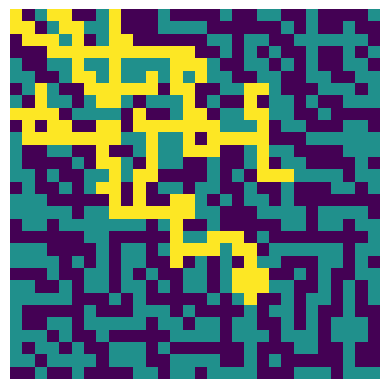

In [76]:
solve_puzzle_2((1,1), 50, 1358)

---

<a id='day14'><a/>

## --- Day 14: One-Time Pad ---

##### Part 1:

In [61]:
def string_to_md5_hex(code: str, stretched=False) -> str:
    """
    converts a string to an hexadecimal representation of its md5 hash, or stretched md5 hash, depending on the value of the 
    parameter stretched
    """
    result = md5(code.encode()).hexdigest()
    if not stretched:
        return result
        
    for _ in range(2016):
        result = md5(result.encode()).hexdigest()
    return result


def solve_puzzle(salt, stretched=False):
    keys = []
    i = 0
    storage = {}
    triple_pattern = re.compile("(.)\\1\\1")
    
    while len(keys) < 64:
    # for _ in range(1000):
    
        code = salt + str(i)
        if code not in storage.keys():
            storage[code] = string_to_md5_hex(code, stretched)
        
        hash_code = storage[code]
        
        match = triple_pattern.search(hash_code)
        if match:
            triplet = match.group(0)[0]
            penta_pattern = re.compile(f"({triplet})\\1\\1\\1\\1")
            for j in range(i+1, i+1001):
                new_code = salt + str(j)
                if new_code not in storage.keys():
                    storage[new_code] = string_to_md5_hex(new_code, stretched)
            
                hash_code = storage[new_code]
                match = penta_pattern.search(hash_code)
                if match:
                    keys.append(i)
                    break
        i += 1
    
    return keys[-1]


In [62]:
solve_puzzle('abc')

22728

In [63]:
solve_puzzle('jlmsuwbz')

35186

##### Part 2:

In [64]:
solve_puzzle('abc', stretched=True)

22551

In [65]:
solve_puzzle('jlmsuwbz', stretched=True)

22429

---

<a id='day15'><a/>

## --- Day 15: Timing is Everything ---

##### Part 1:

In [33]:
class Disc:
    def __init__(self, _id: int, positions: int, initial_slot: int):
        self._id = _id
        self.positions = positions
        self.initial_slot = initial_slot

    def get_slot_position(self, time: int) -> int:
        return (self.initial_slot + time) % self.positions

    def __repr__(self):
        return f'Disc #{self._id} has {self.positions} positions; at time=0, it is at position {self.initial_slot}'


def parse_input(puzzle_input: str) -> List[Disc]:
    with open(puzzle_input) as f:
        discs = f.read().splitlines()
    discs = [disc[:-1].split() for disc in discs]
    discs = [(int(disc[3]), int(disc[-1])) for disc in discs]
    discs = [Disc(i+1, disc[0], disc[1]) for i, disc in enumerate(discs)]
    return discs


def solve_puzzle(discs: List[Disc]) -> int:
    t = 0
    while True:
        ball_positions = [disc.get_slot_position(t + disc._id) for disc in discs]
        if sum(ball_positions) == 0:
            break
        t += 1
    return t  

In [34]:
discs = parse_input('data/day15_example')
solve_puzzle(discs)

5

In [35]:
discs = parse_input('data/day15')
solve_puzzle(discs)

400589

##### Part 2:

In [37]:
discs = parse_input('data/day15')
last_id = discs[-1]._id
new_disc = Disc(last_id + 1, 11, 0)
discs.append(new_disc)
solve_puzzle(discs)

3045959

---

<a id='day16'><a/>

## --- Day 16: Dragon Checksum ---

##### Part 1:

In [61]:
def invert(data: str) -> str:
    """
    Change 0s->1s and 1s->0s in a string
    """
    return data.replace('0','2').replace('1','0').replace('2','1')

def generate_data(a: str):
    """
    Computes one step by generating data with the rules given in the puzzle
    """
    return a + '0' + invert(a[::-1])

def get_full_disk_data(initial_state: str, size: int) -> str:
    """
    Given a initial state, data is generated until we have the desired length of data
    """
    data = initial_state
    while len(data) < size:
        data = generate_data(data)
    return data[:size]

def get_checksum(disk: str) -> str:
    """
    Computes the reduction of the data in order to get the checksum with the rules given in the puzzle
    """
    double_pattern = re.compile(r'(0|1)\1')
    checksum = disk
    while len(checksum) % 2 == 0:
        pairs = [checksum[i*2:i*2+2] for i in range(len(checksum)//2)]
        checksum = "".join(['1' if re.match(pattern, pair) else '0' for pair in pairs])
    return checksum


In [62]:
# Example
disk = get_full_disk_data('10000', 20)
get_checksum(disk)

'01100'

In [63]:
# Puzzle
disk = get_full_disk_data('11100010111110100', 272)
get_checksum(disk)

'10100011010101011'

##### Part 2:

In [65]:
# Puzzle
disk = get_full_disk_data('11100010111110100', 35651584)
get_checksum(disk) # takes half a minute. Probably exist a smarter and faster way...

'01010001101011001'

---

<a id='day17'><a/>

## --- Day 17: Two Steps Forward ---

##### Part 1:

Seems a BFS algorithm can get the job done. Optimizations are not clear since each step in the path produces a different scenario. Let's pray for a high ratio of dead-ends and not having issues with the search space.

In [86]:
def get_available_doors(position: tuple, passcode: str) -> str:

    x, y = position
    encrypted = md5(passcode.encode()).hexdigest()[:4]
    mask_open = [True if ch in ['b','c', 'd', 'e', 'f'] else False for ch in encrypted]
    mask_limits = [y > 0, y < 3, x > 0, x < 3]
    
    mask = [mask_open[i] and mask_limits[i] for i in range(4)]
    available_doors = "".join([door if is_available else '' for door, is_available in zip('UDLR', mask)])
    return available_doors

def get_new_position(position: tuple, direction: str) -> tuple:
    x, y = position
    if direction == 'U':
        y -= 1
    elif direction == 'D':
        y += 1
    elif direction == 'L':
        x -= 1
    else:
        x += 1
    return (x, y)


def solve_puzzle_1(initial_state: tuple, passcode; str) -> str:

    state = (initial_position, passcode)
    q = deque()
    q.append(state)
    
    while q:
        current_position, current_passcode = q.popleft()
    
        if current_position == (3, 3):
            result = current_passcode[len(passcode):]
            break
    
        for direction in get_available_doors(current_position, current_passcode):
            new_position = get_new_position(current_position, direction)
            new_passcode = current_passcode + direction
            q.append((new_position, new_passcode))
    
    return result

In [98]:
# Examples
print(solve_puzzle_1((0,0), 'ihgpwlah'))
print(solve_puzzle_1((0,0), 'kglvqrro'))
print(solve_puzzle_1((0,0), 'ulqzkmiv'))

DDRRRD
DDUDRLRRUDRD
DRURDRUDDLLDLUURRDULRLDUUDDDRR


In [99]:
# Puzzle 1
print(solve_puzzle_1((0,0), 'pgflpeqp'))

RDRLDRDURD


##### Part 2:

In [102]:

def solve_puzzle_2(initial_state: tuple, passcode: str) -> int:

    state = (initial_position, passcode)
    q = deque()
    q.append(state)
    max_path_length = 0
    
    while q:
        current_position, current_passcode = q.popleft()
    
        if current_position == (3, 3):
            result = current_passcode[len(passcode):]
            max_path_length = max(max_path_length, len(result))
            continue
    
        for direction in get_available_doors(current_position, current_passcode):
            new_position = get_new_position(current_position, direction)
            new_passcode = current_passcode + direction
            q.append((new_position, new_passcode))
    
    return max_path_length

In [104]:
# Examples
print(solve_puzzle_2((0,0), 'ihgpwlah'))
print(solve_puzzle_2((0,0), 'kglvqrro'))
print(solve_puzzle_2((0,0), 'ulqzkmiv'))

370
492
830


In [105]:
# Puzzle 2
print(solve_puzzle_2((0,0), 'pgflpeqp'))

596


---

<a id='day18'><a/>

## --- Day 18: Like a Rogue ---

##### Part 1:

In [2]:
def process_triplet(triplet: np.array) -> int:
    # check simetry
    if all(triplet == triplet[::-1]):
        return 0
    else:
        return 1

In [17]:
def solve_puzzle_1(initial_row, depth, verbose=False):
    
    initial_row_numeric = [int(ch) for ch in initial_row.replace('.', '0').replace('^', '1')]
    
    room = np.zeros((depth,len(initial_row_numeric)), dtype=int)
    room[0] = np.array(initial_row_numeric)
    room_pad = np.pad(room, ((0,0),(1,1)), mode='constant', constant_values = 0)
    
    for j in range(depth-1):
        if verbose and j%50000 == 0:
            print(f'Depth: {j}')
        for i in range(len(initial_row_numeric)):
            room_pad[j+1, i+1] = process_triplet(room_pad[j][i:i+3])
    
    room = room_pad[:, 1:-1]
    available = (room == 0).sum()
    print(room)
    return available
    

In [18]:
solve_puzzle_1('..^^.', 3)

[[0 0 1 1 0]
 [0 1 1 1 1]
 [1 1 0 0 1]]


6

In [19]:
solve_puzzle_1('.^^.^.^^^^', 10)

[[0 1 1 0 1 0 1 1 1 1]
 [1 1 1 0 0 0 1 0 0 1]
 [1 0 1 1 0 1 0 1 1 0]
 [0 0 1 1 0 0 0 1 1 1]
 [0 1 1 1 1 0 1 1 0 1]
 [1 1 0 0 1 0 1 1 0 0]
 [1 1 1 1 0 0 1 1 1 0]
 [1 0 0 1 1 1 1 0 1 1]
 [0 1 1 1 0 0 1 0 1 1]
 [1 1 0 1 1 1 0 0 1 1]]


38

In [20]:
solve_puzzle_1('.^^..^...^..^^.^^^.^^^.^^^^^^.^.^^^^.^^.^^^^^^.^...^......^...^^^..^^^.....^^^^^^^^^....^^...^^^^..^', 40)

[[0 1 1 ... 0 0 1]
 [1 1 1 ... 1 1 0]
 [1 0 0 ... 0 1 1]
 ...
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 1 0]
 [1 1 1 ... 0 0 1]]


2005

##### Part 2:

In [21]:
solve_puzzle_1('.^^..^...^..^^.^^^.^^^.^^^^^^.^.^^^^.^^.^^^^^^.^...^......^...^^^..^^^.....^^^^^^^^^....^^...^^^^..^', 400000, verbose=True)

Depth: 0
Depth: 50000
Depth: 100000
Depth: 150000
Depth: 200000
Depth: 250000
Depth: 300000
Depth: 350000
[[0 1 1 ... 0 0 1]
 [1 1 1 ... 1 1 0]
 [1 0 0 ... 0 1 1]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 1 ... 1 1 0]
 [1 0 0 ... 0 1 1]]


20008491

---

<a id='day19'><a/>

## --- Day 19: An Elephant Named Joseph ---

##### Part 1:

For this problem we can implement a circular linked list made of Elfs, each one linked to the elf to the left.

In [5]:

class Elf:
    def __init__(self, _id):
        self._id = _id
        self.presents = 1
        self.next_elf = None

    def __repr__(self):
        return f'({self._id}, {self.presents})'

num_elfs = 3004953

def solve_puzzle_1(num_elfs: int) -> None:

    # implementation of circular linked list
    elfs = [Elf(i+1) for i in range(num_elfs)]
    for i in range(num_elfs):
        elfs[i].next_elf = elfs[(i+1)%num_elfs]

    elf = elfs[0] # initializer
    while True:
        if elf.next_elf == elf:  # finish condition. Elf points to itself, means that is the only one remaining
            winner = elf
            break
    
        elf.presents += elf.next_elf.presents  # steal presents of the next elf
        elf.next_elf = elf.next_elf.next_elf   # delete next elf
        elf = elf.next_elf                     # pass turn to the next elf
    
    print(f'Winner elf is number {winner._id}, wich has {winner.presents} presents')
    

In [15]:
# simple example
solve_puzzle_1(5)

Winner elf is number 3, wich has 5 presents


3

In [16]:
# Puzzle 1
solve_puzzle_1(3004953)

Winner elf is number 1815603, wich has 3004953 presents


1815603

##### Part 2:

At first glance, a regular python list allows to calculate the across element easily. By deleting each stolen elf we could get the result. But the big number of elfs, and the unefficiency of regular lists to compute deletings drive us to a very slow solution.



Links are no longer usefull. We tried to use the position of elfs in a regular list instead.
- Calculation of the elf across the circle can be easily implemented.
- The elf stolen have to be deleted from the list.
- A pointer can track which elf is next in their turn.

But the deletion of elements in a huge list becomes slow again, because the reallocation in memory of the elements.


Desperate approach: find a pattern!

In [11]:
def get_position_of_across_elf(number_of_elfs, current_elf):
    return (current_elf + number_of_elfs//2)%number_of_elfs

def get_winner_elf(num_elfs: int) -> None:

    elfs = [Elf(i+1) for i in range(num_elfs)]
    current_position = 0 
    while True:
        if len(elfs) == 1:   # finish condition. Only one elf remaining
            winner = elfs[0]
            break
        
        if len(elfs)%10000 == 0:
            print(current_position, len(elfs))
        stolen_elf_position = get_position_of_across_elf(len(elfs), current_position)
        elfs[current_position].presents += elfs[stolen_elf_position].presents
        del elfs[stolen_elf_position]
        if stolen_elf_position < current_position:
            current_position = (current_position) % len(elfs)
        else:
            current_position = (current_position + 1) % len(elfs)
    
    return winner._id

In [33]:
for i in range(2,244):
    print((i, get_winner_elf(i)), end=' ')

(2, 1) (3, 3) (4, 1) (5, 2) (6, 3) (7, 5) (8, 7) (9, 9) (10, 1) (11, 2) (12, 3) (13, 4) (14, 5) (15, 6) (16, 7) (17, 8) (18, 9) (19, 11) (20, 13) (21, 15) (22, 17) (23, 19) (24, 21) (25, 23) (26, 25) (27, 27) (28, 1) (29, 2) (30, 3) (31, 4) (32, 5) (33, 6) (34, 7) (35, 8) (36, 9) (37, 10) (38, 11) (39, 12) (40, 13) (41, 14) (42, 15) (43, 16) (44, 17) (45, 18) (46, 19) (47, 20) (48, 21) (49, 22) (50, 23) (51, 24) (52, 25) (53, 26) (54, 27) (55, 29) (56, 31) (57, 33) (58, 35) (59, 37) (60, 39) (61, 41) (62, 43) (63, 45) (64, 47) (65, 49) (66, 51) (67, 53) (68, 55) (69, 57) (70, 59) (71, 61) (72, 63) (73, 65) (74, 67) (75, 69) (76, 71) (77, 73) (78, 75) (79, 77) (80, 79) (81, 81) (82, 1) (83, 2) (84, 3) (85, 4) (86, 5) (87, 6) (88, 7) (89, 8) (90, 9) (91, 10) (92, 11) (93, 12) (94, 13) (95, 14) (96, 15) (97, 16) (98, 17) (99, 18) (100, 19) (101, 20) (102, 21) (103, 22) (104, 23) (105, 24) (106, 25) (107, 26) (108, 27) (109, 28) (110, 29) (111, 30) (112, 31) (113, 32) (114, 33) (115, 34) (

In [31]:
# There is a pattern:

#  3 -> 3 = 3**1
#  9 -> 9 = 3**2
# 27 -> 27 = 3**3
# 81 -> 81 = 3**4

# between cubes: starting in 1, first half goes up 1 by 1, second half 2 by 2

In [50]:
def solve_puzzle_2(num_elfs):
    
    cubes = [3**i for i in range(16)]
    for i, cube in enumerate(cubes):
        if num_elfs <= cube:
            break
    
    inf_cube = cubes[i-1]
    sup_cube = cubes[i]
    
    new_num = num_elfs - inf_cube
    
    if new_num <= inf_cube:
        winner = new_num
    else:
        winner = inf_cube + (new_num - inf_cube) * 2
    
    return winner
        

In [59]:
solve_puzzle_2(5)

2

In [58]:
solve_puzzle_2(3004953)

1410630

---

<a id='day20'><a/>

## --- Day 20: Firewall Rules ---

##### Part 1:

In [138]:
class IP_Range:

    def __init__(self, inf, sup):
        self.inf = inf
        self.sup = sup

    
    def __repr__(self):
        return f'{self.inf}-{self.sup}'


    def __lt__(self, other):
        """
        We need this to use the function sorted. We want to sort by the lower part of the range
        """
        return self.inf < other.inf

    
    def overlaps(self, other) -> bool:
        """
        Check if two IP_Range overlap
        """
        if self.inf <= other.inf:
            low_range, high_range = self, other
        else:
            low_range, high_range = other, self

        return high_range.inf <= low_range.sup + 1

    
    def merge(self, other):
        """
        Merge two IP_Ranges that are overlapping into one unique IP_Range including all IPs of both IP_Ranges.
        If the IP_Ranges don't overlap an error is raised.
        """
        if not self.overlaps(other):
            raise ValueError('Cannot merge non overlapping ranges')

        return IP_Range(min(self.inf, other.inf), max(self.sup, other.sup))



def merge_all(ips: List[IP_Range]) -> List[IP_Range]:
    """
    Merge a list of IP_Ranges eliminating all the overlappings between them.
    The result is an ordered List of IP_Ranges that don't overlap 
    """
    ips = sorted(ips)
    counter = 0
    while True:
        if ips[counter].overlaps(ips[counter+1]):
            ips[counter] = ips[counter].merge(ips[counter+1])
            del ips[counter+1]
            if counter == len(ips) - 1:
                break
        else:
            counter += 1
            if counter == len(ips) - 1:
                break
    return ips

In [139]:
# toy example
ip1 = IP_Range(5, 8)
ip2 = IP_Range(0, 2)
ip3 = IP_Range(4, 7)
ips = [ip1, ip2, ip3]
ips = merge_all(ips)
first_available_ip = ips[0].sup + 1
print(ips, first_available_ip)

[0-2, 4-8] 3


In [141]:
with open('data/day20') as f:
    ips = f.read().splitlines()

ips = [ip_range.split('-') for ip_range in ips]
ips = [IP_Range(int(pair[0]), int(pair[1])) for pair in ips]
ips = sorted(ips)
ips = merge_all(ips)
first_available_ip = ips[0].sup + 1
first_available_ip

22887907

##### Part 2:

In [147]:
num_availables_ips = 0
for i in range(len(ips)-1):
    num_availables_ips += ips[i+1].inf - ips[i].sup - 1

num_availables_ips

109

---

<a id='day21'><a/>

## --- Day 21: Scrambled Letters and Hash ---

##### Part 1:

In [2]:
class Password:

    def __init__(self, password):
        self.password = password

    
    def __repr__(self):
        return self.password

    
    def swap_positions(self, i, j):
        i, j = min(i, j), max(i,j)
        self.password = self.password[:i] + self.password[j] + self.password[i+1:j] + self.password[i] + self.password[j+1:]

    
    def swap_letters(self, a, b):
        self.password = self.password.replace(a, '*').replace(b, a).replace('*', b)

    
    def reverse(self, i, j):
        self.password = self.password[:i] + self.password[i:j+1][::-1] + self.password[j+1:]

    
    def rotate_left(self, i):
        i = i % len(self.password)
        self.password = self.password[i:] + self.password[:i]

    
    def rotate_right(self, i):
        self.rotate_left(-i)

    
    def move(self, i, j):
        if i < j:
            self.password = self.password[:i] + self.password[i+1:j+1] + self.password[i] + self.password[j+1:]
        else:
            self.password = self.password[:j] + self.password[i] + self.password[j:i] + self.password[i+1:]

    
    def rotate_based(self, letter):
        i = self.password.index(letter)
        i = i+1 if i<4 else i+2
        self.rotate_right(i)

    def process_step(self, step):
        if step[0] == 'swap':
            if step[1] == 'position':
                self.swap_positions(int(step[2]), int(step[5]))
            if step[1] == 'letter':
                self.swap_letters(step[2], step[5])
                
        if step[0] == 'reverse':
            self.reverse(int(step[2]), int(step[4]))
        
        if step[0] == 'rotate':
            if step[1] == 'left':
                self.rotate_left(int(step[2]))
            if step[1] == 'right':
                self.rotate_right(int(step[2]))
            if step[1] == 'based':
                self.rotate_based(step[6])

        if step[0] == 'move':
            self.move(int(step[2]), int(step[5]))


def parse_input(puzzle_input):

    with open(puzzle_input) as f:
        steps = f.read().splitlines()
        steps = [step.split(' ') for step in steps]

    return steps

In [3]:
def solve_puzzle_1(puzzle_input, password):
    steps = parse_input(puzzle_input)
    p = Password(password)
    for step in steps:
        p.process_step(step)
    return p.password

In [4]:
solve_puzzle_1('data/day21_example', 'abcde')

'decab'

In [5]:
solve_puzzle_1('data/day21', 'abcdefgh')

'gcedfahb'

##### Part 2:

The "rotate based" instruction is tricky to reverse. In other hand, 8! is not a big deal to process in order to find the right permutation of 'abcdefgh' that gets the goal

In [26]:
def solve_puzzle_2(puzzle_input, scrambled):
    pass_base = 'abcdefgh'[:len(scrambled)]
    for password in permutations(pass_base, len(pass_base)):
        password = ''.join(password)
        solution = solve_puzzle_1(puzzle_input, password)
        if solution == scrambled:
            return password

In [27]:
solve_puzzle_2('data/day21_example', 'decab')

'abcde'

In [28]:
solve_puzzle_2('data/day21', 'fbgdceah')

'hegbdcfa'

---

<a id='day22'><a/>

## --- Day 22: Grid Computing ---

##### Part 1:

In [2]:
with open('data/day22') as f:
    nodes = f.read().splitlines()[2:]

coords = [tuple(int(coord[1:]) for coord in node.split(' ')[0].split('-')[1:]) for node in nodes]
data = [node.split() for node in nodes]
data = [(int(node[1][:-1]), int(node[2][:-1]), int(node[3][:-1]), int(node[4][:-1])) for node in data]
data = list(zip(coords, data))
data[:5]

[((0, 0), (91, 71, 20, 78)),
 ((0, 1), (88, 72, 16, 81)),
 ((0, 2), (94, 69, 25, 73)),
 ((0, 3), (88, 73, 15, 82)),
 ((0, 4), (94, 66, 28, 70))]

In [3]:
counter = 0

for node_A in data:
    for node_B in data:
        condition_1 = node_A[1][1] != 0             # Node A is not empty (its Used is not zero).
        condition_2 = node_A[0] != node_B[0]        # Nodes A and B are not the same node.
        condition_3 = node_A[1][1] < node_B[1][2]   # The data on node A (its Used) would fit on node B (its Avail).
        
        if condition_1 and condition_2 and condition_3:
            counter += 1

print(counter)

1024


##### Part 2:

In [14]:
new_data = []

for node in data:
    if node[1][1] == 0:
        t = 0
    elif node[1][1] > 100:
        t = 2
    else:
        t = 1
    new_data.append((node[0], node[1], t))

new_data[:5]

[((0, 0), (91, 71, 20, 78), 1),
 ((0, 1), (88, 72, 16, 81), 1),
 ((0, 2), (94, 69, 25, 73), 1),
 ((0, 3), (88, 73, 15, 82), 1),
 ((0, 4), (94, 66, 28, 70), 1)]

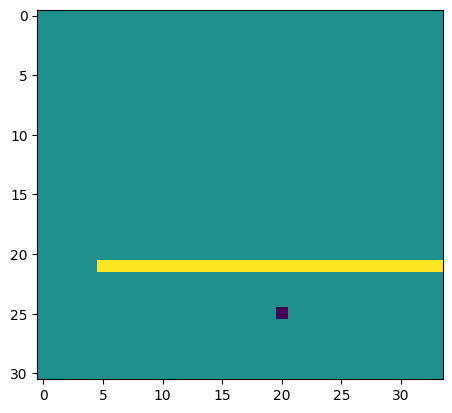

In [15]:
grid = np.zeros((31,34), dtype=int)
for coords, values, t in new_data:
    grid[coords[1], coords[0]] = t


plt.imshow(grid);

I get the result by hand, given that the optimum path is quite obvious 

In [22]:
def manhattan_distance(p2, p1):
    x2, y2 = p2
    x1, y1 = p1
    return abs(x2 - x1) + abs(y2 - y1)

In [38]:
steps = manhattan_distance((20, 25), (4, 25))
steps += manhattan_distance((4, 25), (4, 0))
steps += manhattan_distance((4, 0), (32, 0))
steps += manhattan_distance((33, 0), (32, 0))
# Moving the empty cell around the data in a U shape and moving the data 1 step left spend 5 steps. 
# We have to do that 32 times
steps += 32 * 5      
steps

230

---

<a id='day23'><a/>

## --- Day 23: Safe Cracking ---

##### Part 1:

In [8]:
with open('data/day23') as f:
    steps = f.read().splitlines()
    steps = [step.split() for step in steps]

a, b, c, d = 7, 0, 0, 0
i = 0
while i < len(steps):
    
    step = steps[i]
    # print(step, a, b, c, d)
    
    if step[0] == 'cpy':
        exec(f'{step[2]}={step[1]}')
    elif step[0] == 'inc':
        exec(f'{step[1]} += 1')
    elif step[0] == 'dec':
        exec(f'{step[1]} -= 1')
    elif step[0] == 'jnz':
        if eval(f'{step[1]} != 0'):
            i += eval(step[2])
            continue  # to skip incrementing one of the other cases
    elif step[0] == 'tgl':
        j = i + eval(step[1])
        if j < 0 or j > len(steps)-1:
            i += 1
            continue
        if len(steps[j]) == 2:  # 1 argument
            if steps[j][0] == 'inc':
                steps[j][0] = 'dec'
            else:
                steps[j][0] = 'inc'
        if len(steps[j]) == 3:  # 2 arguments
            if steps[j][0] == 'jnz':
                steps[j][0] = 'cpy'
            else:
                steps[j][0] = 'jnz'
        
    i += 1

print(a)

14065


##### Part 2:

Normal running takes too long. The key here is to know the values of a,b,c,d when passing the step 16. Steps ahead of 16 have also changed at that point due to several calls to the `tgl` instruction. It's not hard to find out there is a pattern depending on the initial value of a:

In [56]:
for i in [7,8,9,10,11,12]:
    print(i, math.factorial(i) + 9025)

7 14065
8 49345
9 371905
10 3637825
11 39925825
12 479010625


---

<a id='day24'><a/>

## --- Day 24: Air Duct Spelunking ---

##### Part 1:

- Determine the shortest path between each pair of points
- Travelling Salesman Problem

In [140]:

def parse_input(puzzle_input: str) -> np.array:
    with open(puzzle_input) as f:
        lines = f.read().splitlines()
    
    return np.array([list(line) for line in lines])


def get_nodes(ducts_map: np.array) -> dict:
    
    nodes = {}
    i = 0
    while True:
        coords = np.where(ducts_map == str(i))
        if coords[0].size == 0:
            break
        coords = (coords[0][0], coords[1][0])
        nodes[str(i)] = coords
        i += 1
    
    return nodes


def get_next_positions(position: tuple, ducts_map: np.array) -> list[tuple]:
    x, y = position
    assert 0 < x < ducts_map.shape[0], 'position outside bounds'
    assert 0 < y < ducts_map.shape[1], 'position outside bounds'
    posN, posE, posS, posW = (x-1, y), (x, y+1), (x+1, y), (x, y-1)
    next_positions = []
    for pos in [posN, posE, posS, posW]:
        if ducts_map[pos] != '#':
            next_positions.append(pos)

    return next_positions


def get_minimum_distance(node_from, node_to, ducts_map):

    # BFS algorithm to get the minimum steps to reach from a to b
    q = deque()
    q.append((node_from, 0))
    cache = []
    steps = 0
    while q:
        position, steps = q.popleft()
        
        if position == node_to:
            break
            
        if position in cache:
            continue
        else:
            cache.append(position)
            
        next_positions = get_next_positions(position, ducts_map)
        for new_position in next_positions:
            q.append((new_position, steps + 1))
    
    return steps


def get_distance_matrix(nodes, ducts_map):
    
    distance_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)
    for i, node_from in enumerate(nodes.keys()):
        for j, node_to in enumerate(nodes.keys()):
            if i < j:
                distance = get_minimum_distance(nodes[node_from], nodes[node_to], ducts_map)
                distance_matrix[i, j] = distance
                distance_matrix[j, i] = distance
    df = pd.DataFrame(distance_matrix, index=nodes.keys(), columns=nodes.keys())
    
    return df


def get_optimum_path(distance_matrix: pd.DataFrame) -> int:
    # Brute force
    possible_routes = [list(pairwise(permut)) for permut in list(permutations(distance_matrix.columns[1:]))]
    possible_routes = [[('0', route[0][0])] + route for route in possible_routes]
    min_distance = 1000000
    for route in possible_routes:
        distance = 0
        for stage in route:
            distance += distance_matrix.loc[stage[0], stage[1]]
        min_distance = min(distance, min_distance)
    
    return min_distance


def solve_puzzle_1(puzzle_input):
    
    ducts_map = parse_input(puzzle_input)    
    nodes = get_nodes(ducts_map)
    distance_matrix = get_distance_matrix(nodes, ducts_map)
    return get_optimum_path(distance_matrix)

In [141]:
solve_puzzle_1('data/day24_example')

14

In [142]:
solve_puzzle_1('data/day24')

456

##### Part 2:

In [143]:
def get_optimum_path_returning(distance_matrix: pd.DataFrame) -> int:
    # Brute force
    possible_routes = [list(pairwise(permut)) for permut in list(permutations(distance_matrix.columns[1:]))]
    possible_routes = [[('0', route[0][0])] + route + [(route[-1][1], '0')] for route in possible_routes]
    min_distance = 1000000
    for route in possible_routes:
        distance = 0
        for stage in route:
            distance += distance_matrix.loc[stage[0], stage[1]]
        min_distance = min(distance, min_distance)
    
    return min_distance


def solve_puzzle_2(puzzle_input):
    
    ducts_map = parse_input(puzzle_input)    
    nodes = get_nodes(ducts_map)
    distance_matrix = get_distance_matrix(nodes, ducts_map)
    return get_optimum_path_returning(distance_matrix)

In [144]:
solve_puzzle_2('data/day24_example')

20

In [145]:
solve_puzzle_2('data/day24')

704

---

<a id='day25'><a/>

## --- Day 25: Clock Signal ---

##### Part 1:

Brute force is fine

In [10]:
with open('data/day25') as f:
    steps = f.read().splitlines()
    steps = [step.split() for step in steps]


a_initial = 198

for a_initial in range(500):

    a, b, c, d = a_initial, 0, 0, 0
    i = 0
    signal = '1'
    while i < len(steps):

        if len(signal) == 100:
            print(f'Solution is {a_initial}')
            break
        
        step = steps[i]
        
        if step[0] == 'cpy':
            exec(f'{step[2]}={step[1]}')
        elif step[0] == 'inc':
            exec(f'{step[1]} += 1')
        elif step[0] == 'dec':
            exec(f'{step[1]} -= 1')
        elif step[0] == 'jnz':
            if eval(f'{step[1]} != 0'):
                i += eval(step[2])
                continue  # to skip incrementing one of the other cases
        elif step[0] == 'out':
            new_value = str(eval(f'{step[1]}'))
            # print(new_value, end='')
            if new_value not in ['0','1'] or new_value == signal[-1]:
                break
            else:
                signal += new_value
            
        i += 1

Solution is 198




---